In [59]:
import random                   
import numpy as np              
import sys                      
import matplotlib.pyplot as plt

# Laberinto (No modificar)

In [60]:
"""Rellena un arreglo bidimensional con 1s o 0s de manera aleatoria"""
def inicializarMapa(mapa, P):
    for i in range(len(mapa)):
        for j in range(len(mapa[0])): 
            valor = random.uniform(0, 1) 
            if valor < P:
                mapa[i][j] = 1
                
def contarVecinosVivos(mapa, x, y):
    dimy = len(mapa)
    dimx = len(mapa[0])     
    contador = 0     
    for i in range(-1, 2):
        for j in range(-1, 2):             
            if (i == 0 and j == 0):
                pass 
            else:
                vecinox = x + i
                vecinoy = y + j 
                if (vecinox < 0 or vecinox >= dimx or vecinoy < 0 or vecinoy >= dimy):
                    contador += 1 
                else:
                    contador += mapa[vecinoy][vecinox] 
    return contador

In [61]:
def calcularPaso(mapa, lim_aislamiento, lim_nacimiento):
    dimy = len(mapa)
    dimx = len(mapa[0])
    mapa_aux = np.zeros((dimy, dimx), dtype = int)
    for x in range(dimx):
        for y in range(dimy):
            num_vecinos = contarVecinosVivos(mapa, x, y)
            if mapa[y][x] == 1: 
                if num_vecinos < lim_aislamiento:
                    mapa_aux[y][x] = 0
                else:
                    mapa_aux[y][x] = 1
            elif mapa[y][x] == 0: 
                if num_vecinos > lim_nacimiento:
                    mapa_aux[y][x] = 1
                else:
                    mapa_aux[y][x] = 0
    return mapa_aux

In [62]:
def dibujarMapa(mapa):
  plt.imshow(mapa)
  plt.colorbar()
  plt.show()

In [63]:
def floodFill(mapa, posy, posx, num_region):
    ysize = len(mapa)
    xsize = len(mapa[0])
    pila = set(((posy, posx),))
    area = 0
    while len(pila) > 0:
        y, x = pila.pop()
        area = area + 1
        if mapa[y][x] == 0:
            mapa[y][x] = num_region
            if y > 0:
                pila.add((y - 1, x))
            if y < (ysize - 1):
                pila.add((y + 1, x))
            if x > 0:
                pila.add((y, x - 1))
            if x < (xsize - 1):
                pila.add((y, x + 1))
    return area

In [64]:
def eliminarZonasAisladas(mapa):
    dimy = len(mapa)
    dimx = len(mapa[0])
    region = 2
    areas = []
    mapa_aux = np.copy(mapa)   
    for x in range(dimx):
        for y in range(dimy):
            if mapa_aux[y][x] == 0:
                areas.append(floodFill(mapa_aux, y, x, region))
                region = region + 1
    region_maxima = areas.index(max(areas)) + 2
    for x in range(dimx):
        for y in range(dimy):
            if mapa_aux[y][x] != 1 and mapa_aux[y][x] != region_maxima:
                mapa[y][x] = 1
    return mapa

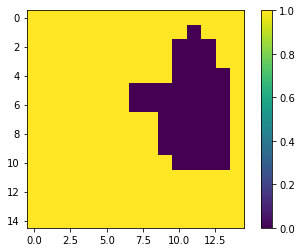

In [65]:
#dimx = max(int(input("Ancho del mapa: ")), 20)
#dimy = max(int(input("Alto del mapa: ")), 20)
dimx = 15
dimy = 15
#lim_aislamiento = int(input("Limite para aislamiento (recomendado 3): "))
lim_aislamiento = 3
#lim_nacimiento = int(input("Limite para nacimiento (recomendado 4): "))
lim_nacimiento = 4
#n = int(input("Num. de pasos para el automata celular (recomendado 5-6): "))
n = 5
#P = float(input("Probabilidad inicializar una casilla como viva (recomendado 0.4): "))
P = 0.4

""" La función *zeros* crea un arreglo  con el tipo de dato y las dimensiones dadas, está relleno con 0s"""
mapa = np.zeros((dimy,dimx), dtype=int)
inicializarMapa(mapa, P)
""" Básicamente, unifica los pasillos que estén juntos, para crear un área más grande """
for i in range(n):
    mapa = calcularPaso(mapa, lim_aislamiento, lim_nacimiento)

"""En caso de que existan zonas aisladas, las eliminará y luego obtendremos solamente una"""
mapa = eliminarZonasAisladas(mapa)
dibujarMapa(mapa)

# Indicaciones generales
Al ejecutar la siguiente celda de código se generará de forma automática un laberinto (diferente en cada ejecución) y se presentará su imagen para mayor referencia.
 
Dicho laberinto se encuentra almacenado en la variable **"mapa"**, este mapa es el que usaran como base para la aplicación del algoritmo de búsqueda "Primero en Profundidad" y "Primero en Anchura".
 
Como podrán ver la variable mapa es una matriz de 0 y 1, en donde los 1's corresponden a las paredes y los 0's a los pasillos libres.
 
Con esta información se necesita un programa que encuentre una ruta entre una coordenada inicial $i$ y una final $j$.
 
Implemente los algoritmos de búsqueda no informada "Primero en profundidad" y "Primero en anchura" para encontrar un camino entre los puntos ingresados por el usuario.
 
Al final tome la solución encontrada por el programa y sustituya las coordenadas por un valor de **0** en la matriz que corresponda e imprima el mapa resultante.

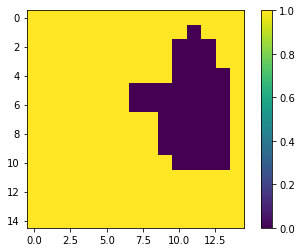

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 0 0 0 1 1]
 [1 1 1 1 1 1 1 1 1 1 0 0 0 1 1]
 [1 1 1 1 1 1 1 1 1 1 0 0 0 0 1]
 [1 1 1 1 1 1 1 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


In [66]:
 
dibujarMapa(mapa) #Usen esta función para imprimir el mapa
#Como pueden ver al imprimir la variable mapa que se generó, es una matriz de 0's y 1's
print(mapa)

# Primero en profundidad

In [ ]:
class Stack:
     def __init__(self):
         self.items = []

     def isEmpty(self):
         return self.items == []

     def push(self, item):
         self.items.append(item)

     def pop(self):
         return self.items.pop()

     def peek(self):
         return self.items[len(self.items)-1]

     def size(self):
         return len(self.items)

In [67]:
mapaProfundidad = mapa #Copia de la matríz original para dibujar la solución encontrada en profundidad

""" mapa[y][x] """

mapaProfundidad[2][1] = 3

print(mapaProfundidad)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 0 1 1 1]
 [1 3 1 1 1 1 1 1 1 1 0 0 0 1 1]
 [1 1 1 1 1 1 1 1 1 1 0 0 0 1 1]
 [1 1 1 1 1 1 1 1 1 1 0 0 0 0 1]
 [1 1 1 1 1 1 1 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


# Primero en anchura

In [68]:
mapaAnchura = mapa #Copia de la matríz original para dibujar la solución encontrada en anchura